In [3]:
import requests
import base64

def get_tts_audio(speaker, text, path):
    # API endpoint
    api_url = 'https://tat-tts.api.translate.tatar/listening/'

    # Parameters
    params = {
        'speaker': speaker,
        'text': text
    }

    try:
        # Perform the GET request with parameters
        response = requests.get(api_url, params=params, headers={'accept': 'application/json'})

        # Check if request was successful
        if response.status_code == 200:
            # Parse JSON response
            json_response = response.json()

            # Extract WAV data and sample rate from JSON
            wav_base64 = json_response['wav_base64']
            sample_rate = json_response['sample_rate']

            # Decode base64 to binary
            audio_data = base64.b64decode(wav_base64)

            # Write the binary audio data to a WAV file
            output_file =path+'/'+ f'{speaker}_{text[:10]}.wav'  # Limiting text length for filename
            with open(output_file, 'wb') as f:
                f.write(audio_data)

            print(f'WAV file saved: {output_file}')
            return output_file
        else:
            print(f'Failed to get response. Status code: {response.status_code}')
            return None
    except requests.RequestException as e:
        print(f'Request failed: {e}')
        return None
#alsu
tatar_strings = [
    "сөю", "бәхет", "дуслык", "гаилә", "татулык", "мәгариф", "мәдәният", "тарих", "халык", "җир",
    "су", "икмәк", "китап", "мәктәп", "университет", "дәрес", "укытучы", "укучы", "студент", "профессор",
    "табиб", "шәфкать туташы", "инженер", "программист", "композитор", "шагыйрь", "язучы", "җыр", "музыка", "бәйрәм",
    "кино", "театр", "сәнгать", "рәссам", "скульптор", "авыл", "шәһәр", "урам", "йорт", "туган",
    "әти", "әни", "бала", "ир", "хатын", "бабай", "әби", "онык", "чәчәк", "көз"
]
for st in tatar_strings:
      speaker = 'almaz'
      text = st

      saved_file = get_tts_audio(speaker, text, "/content/data/almaz")

      if saved_file:
          print(f'TTS audio saved to: {saved_file}')
      else:
          print('Failed to retrieve TTS audio.')
for st in tatar_strings:
      speaker = 'alsu'
      text = st

      saved_file = get_tts_audio(speaker, text, "/content/data/alsu")

      if saved_file:
          print(f'TTS audio saved to: {saved_file}')
      else:
          print('Failed to retrieve TTS audio.')


WAV file saved: /content/data/almaz/almaz_сөю.wav
TTS audio saved to: /content/data/almaz/almaz_сөю.wav
WAV file saved: /content/data/almaz/almaz_бәхет.wav
TTS audio saved to: /content/data/almaz/almaz_бәхет.wav
WAV file saved: /content/data/almaz/almaz_дуслык.wav
TTS audio saved to: /content/data/almaz/almaz_дуслык.wav
WAV file saved: /content/data/almaz/almaz_гаилә.wav
TTS audio saved to: /content/data/almaz/almaz_гаилә.wav
WAV file saved: /content/data/almaz/almaz_татулык.wav
TTS audio saved to: /content/data/almaz/almaz_татулык.wav
WAV file saved: /content/data/almaz/almaz_мәгариф.wav
TTS audio saved to: /content/data/almaz/almaz_мәгариф.wav
WAV file saved: /content/data/almaz/almaz_мәдәният.wav
TTS audio saved to: /content/data/almaz/almaz_мәдәният.wav
WAV file saved: /content/data/almaz/almaz_тарих.wav
TTS audio saved to: /content/data/almaz/almaz_тарих.wav
WAV file saved: /content/data/almaz/almaz_халык.wav
TTS audio saved to: /content/data/almaz/almaz_халык.wav
WAV file saved: 

In [4]:
!pip install resampy
import resampy

import os

import librosa

import numpy as np

from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, models

import os

import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
def extract_features (file_path, maxlen=None):
    try:
        audio, sr = librosa.load(file_path, res_type='kaiser_fast')
        if len(audio) == 0:
           raise ValueError("Input signal length is too small in file: (file_path}")
        if sr != 22050:
            audio= librosa.resample (audio, sr, 22050)
        mfccs= librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)
        if maxlen and mfccs.shape[1] > maxlen:
           mfccs = mfccs[:, :maxlen]
        elif maxlen and mfccs.shape[1] < maxlen:
            mfccs= np.pad(mfccs, ((0, 0), (0, maxlen- mfccs.shape[1])))
        return mfccs
    except Exception as e:
            print("Error processing file (file_path}: {e}")
            return None


In [6]:
def load_data(data_folder, maxlen=None):
      data=[]
      labels=[]
      print(os.listdir(data_folder))
      for id_class in os.listdir(data_folder):
            if id_class=='.ipynb_checkpoints':
                continue
            class_folder=os.path.join(data_folder, id_class)
            if not os.path.isdir(class_folder):
                continue
            for file in os.listdir(class_folder):
                file_path=os.path.join(class_folder, file)
                if not file_path.endswith(('.wav', '.mp3', '.ogg')):
                      continue
                mfccs = extract_features (file_path, maxlen=maxlen)
                if mfccs is not None:
                    data.append(mfccs)
                    labels.append(id_class)
      data_padded =pad_sequences (data, dtype="float32", padding="post", truncating="post", maxlen=maxlen)
      return np.array(data_padded), np.array(labels)

In [7]:
data_folder = '/content/data'
maxlen=150
data, labels = load_data(data_folder, maxlen=maxlen)
train_data, test_data, train_labels, test_labels =train_test_split(data, labels, test_size=0.2, random_state=42)
print(train_labels)

['.ipynb_checkpoints', 'alsu', 'almaz']
['almaz' 'almaz' 'alsu' 'alsu' 'almaz' 'alsu' 'alsu' 'almaz' 'alsu'
 'almaz' 'alsu' 'alsu' 'almaz' 'alsu' 'almaz' 'alsu' 'almaz' 'almaz'
 'alsu' 'alsu' 'alsu' 'alsu' 'alsu' 'almaz' 'alsu' 'alsu' 'almaz' 'alsu'
 'almaz' 'alsu' 'alsu' 'alsu' 'alsu' 'alsu' 'alsu' 'almaz' 'alsu' 'almaz'
 'alsu' 'almaz' 'almaz' 'almaz' 'almaz' 'alsu' 'almaz' 'almaz' 'alsu'
 'almaz' 'almaz' 'almaz' 'almaz' 'alsu' 'almaz' 'alsu' 'almaz' 'almaz'
 'almaz' 'alsu' 'almaz' 'almaz' 'almaz' 'almaz' 'alsu' 'alsu' 'alsu'
 'almaz' 'alsu' 'alsu' 'alsu' 'almaz' 'almaz' 'almaz' 'almaz' 'almaz'
 'alsu' 'almaz' 'almaz' 'alsu' 'almaz' 'almaz']


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#Define the model
model =Sequential()
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(150, 150, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="softmax"))
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(train_labels)
test_labels_encoded =label_encoder.transform(test_labels)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history=model.fit(train_data, train_labels_encoded, epochs=18, validation_data=(test_data, test_labels_encoded))
model.save('id_classifier_model.h5')


Epoch 1/18
3/3 [==============================] - 8s 2s/step - loss: 2.5152 - accuracy: 0.5625 - val_loss: 6.2353 - val_accuracy: 0.4000
Epoch 2/18
3/3 [==============================] - 6s 2s/step - loss: 1.9481 - accuracy: 0.7250 - val_loss: 0.6325 - val_accuracy: 0.7000
Epoch 3/18
3/3 [==============================] - 4s 945ms/step - loss: 0.4049 - accuracy: 0.8375 - val_loss: 0.0699 - val_accuracy: 1.0000
Epoch 4/18
3/3 [==============================] - 3s 1s/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.1727 - val_accuracy: 0.9500
Epoch 5/18
3/3 [==============================] - 4s 1s/step - loss: 0.1012 - accuracy: 0.9625 - val_loss: 0.1053 - val_accuracy: 0.9500
Epoch 6/18
3/3 [==============================] - 3s 1s/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 7/18
3/3 [==============================] - 3s 1s/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 8/18
3/3 [======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

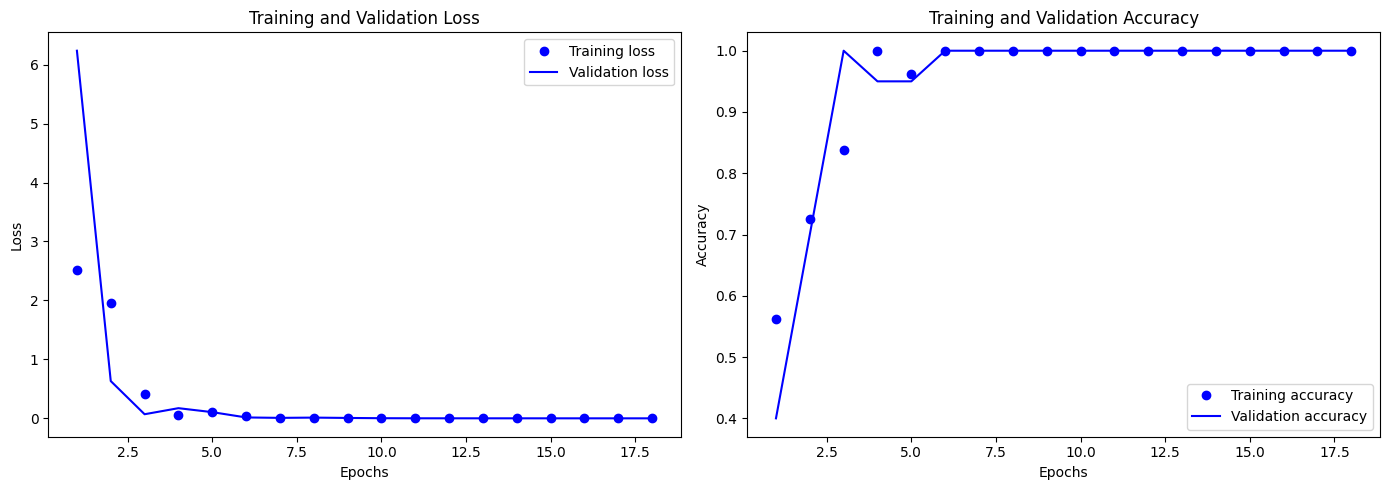

In [15]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Creating epochs range
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
predictions = model.predict(test_data)


1/1 [==============================] - 0s 323ms/step


In [17]:
predicted_labels = np.argmax(predictions, axis=1)


In [18]:
true_labels = test_labels_encoded


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 8  0]
 [ 0 12]]


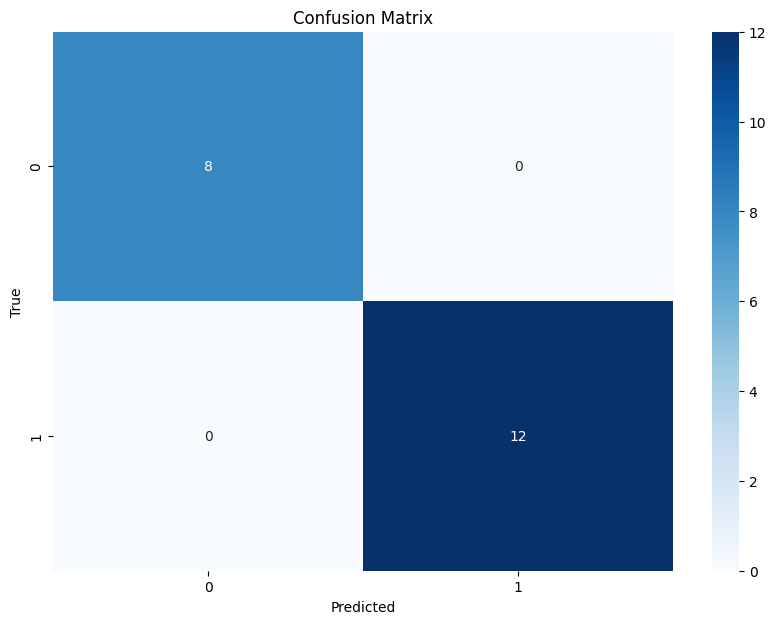

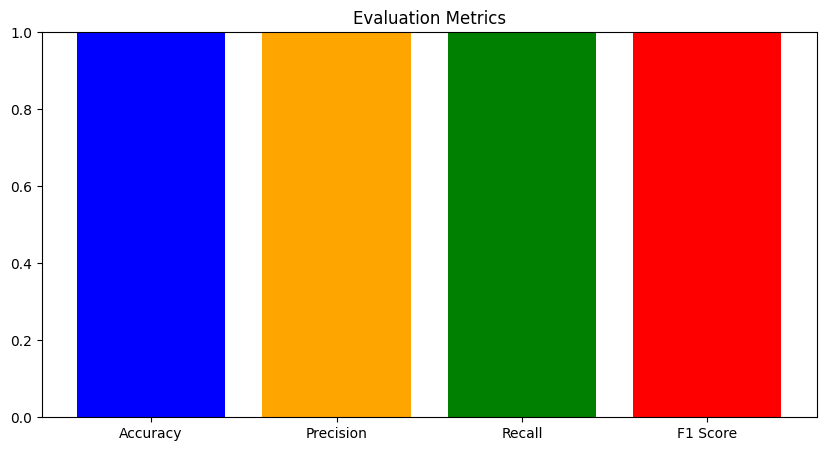

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming true_labels and predicted_labels are defined
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plotting the precision, recall, and F1 score
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.show()


In [ ]:
import tensorflow
def predict_from_file(file_path, model, maxlen=None):
    try:

        # Extract features from the audio file
        audio, sr = librosa.load(file_path, res_type='kaiser_fast')
        if len(audio) == 0:
            raise ValueError(f"Input signal length is too small in file: {file_path}")
        # Resample if needed
        if sr != 22050:
           audio=librosa.resample (audio, sr, 22050)

        mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)
        # Ensure all sequences have the same length


        if maxlen and mfccs.shape[1] > maxlen:
           mfccs = mfccs[:, :maxlen]
        elif maxlen and mfccs.shape[1] < maxlen:

             mfccs = np.pad(mfccs, ((0, 0), (0, maxlen-mfccs.shape[1])))
        # Expand dimensions to match model input shape
        mfccs = np.expand_dims(mfccs, axis=-1)
        mfccs =np.expand_dims (mfccs, axis=0)
        # Resize the input data to match the expected shape (150, 150, 1)
        mfccs_resized = tensorflow.image.resize(mfccs, (150, 150))
        # Make predictions
        prediction = model.predict(mfccs_resized)

        predicted_class = np.argmax(prediction)
        return predicted_class
    except Exception as e:
            print (f"Error predicting from file {file_path}: {e}")
            return None
            # Path to the single wave file for prediction
wave_file_path = '/content/data/alsu/alsu_авыл.wav'
# Make prediction
prediction_result = predict_from_file(wave_file_path, model, maxlen=150)
# Display the predicted class index
print (f'The predicted class index is: {prediction_result}')